In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pylab

%matplotlib inline

terror=pd.read_csv('./globalterrorismdb_0617dist.csv',encoding='ISO-8859-1')

terror.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country', 'region_txt':'Region',
                       'city':'City', 'attacktype1_txt':'AttackType', 'gname':'GroupName', 'targtype1_txt':'Target',
                       'targsubtype1_txt':'TargetSubtype', 'weaptype1_txt':'Weapon', 'nkill':'Killed', 
                       'nwound':'Wounded', 'provstate':'State'}, inplace = True)
terror = terror[['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'latitude', 'longitude', 'AttackType', 'Target', 'TargetSubtype',
                 'summary', 'Weapon', 'Killed', 'Wounded']]

US_attacks = terror.loc[terror['Country'] == 'United States']
US_attacks = US_attacks.loc[US_attacks['Year'] > 1999]

US_attacks.head()

C:\Users\Julio Lopez\AppData\Local\Programs\Python\Python36\lib\site-packages\IPython\core\interactiveshell.py:2705: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Year,Month,Day,Country,Region,State,latitude,longitude,AttackType,Target,TargetSubtype,summary,Weapon,Killed,Wounded
69789,2000,1,1,United States,North America,Michigan,44.405705,-85.714454,Facility/Infrastructure Attack,Business,Industrial/Textiles/Factory,01/1/2000: Four members of the Earth Liberatio...,Incendiary,0.0,0.0
69801,2000,1,3,United States,North America,California,38.232471,-122.644448,Facility/Infrastructure Attack,Business,NaN,01/03/2000: Unknown suspects set three separat...,Incendiary,0.0,0.0
69802,2000,1,3,United States,North America,Ohio,39.103175,-84.511981,Bombing/Explosion,Abortion Related,Clinics,"1/3/2000: In a series of related incidents, a ...",Explosives/Bombs/Dynamite,0.0,0.0
69803,2000,1,3,United States,North America,Ohio,39.103175,-84.511981,Bombing/Explosion,Abortion Related,Clinics,"1/3/2000: In a series of related incidents, a ...",Explosives/Bombs/Dynamite,0.0,0.0
69870,2000,1,15,United States,North America,California,38.232471,-122.644448,Facility/Infrastructure Attack,Business,Farm/Ranch,01/15/2000: The Animal Liberation Front (ALF) ...,Incendiary,0.0,0.0


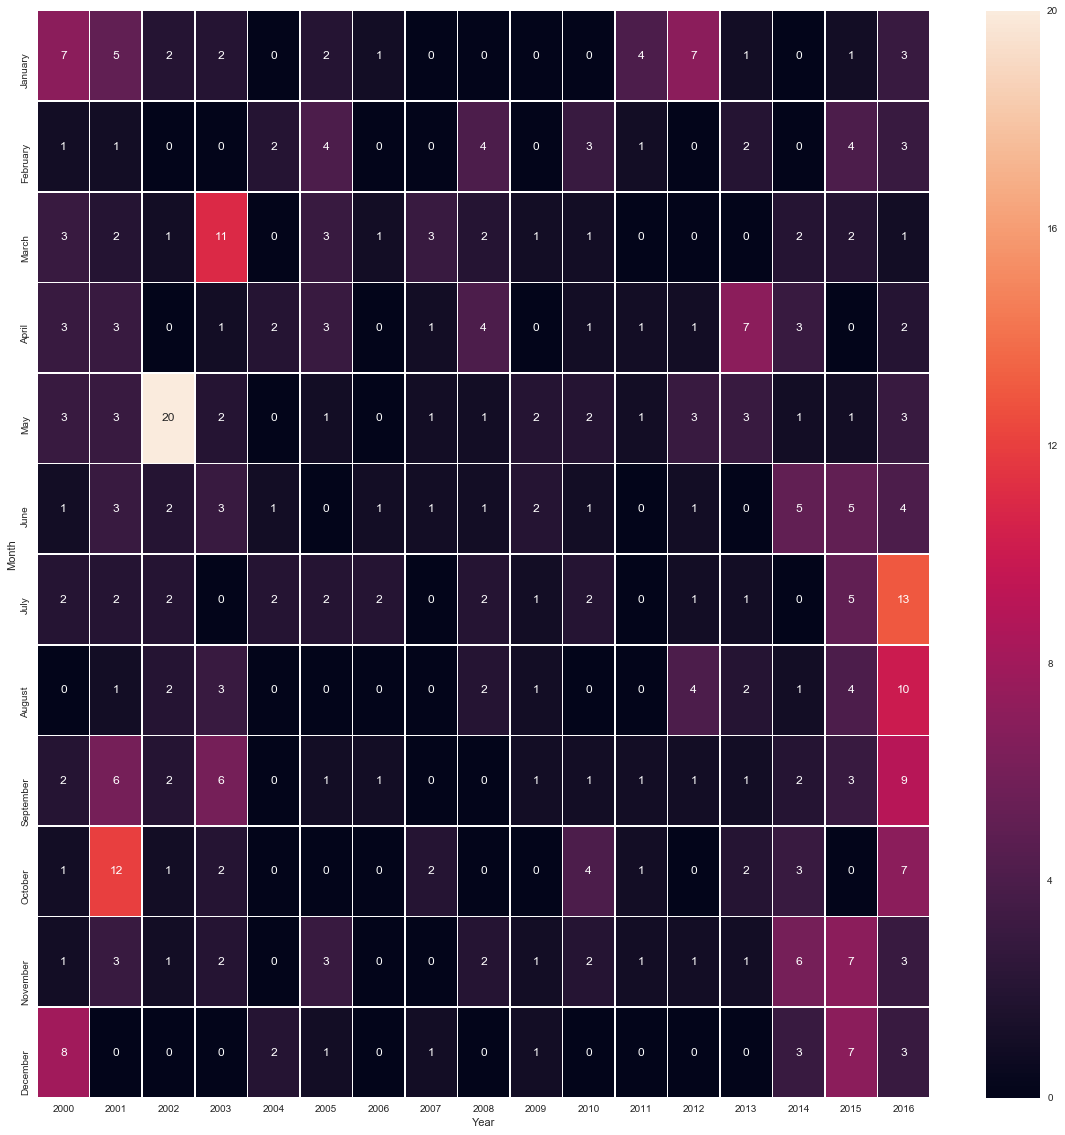

In [ ]:
sns.set()
cols = ['Month', 'Year', 'NumAttacks']
vals = pd.DataFrame(columns=cols)

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i in range(2000, 2017):
    for j in range(1, 13):
        numAttacks = len(US_attacks.loc[(US_attacks['Year'] == i) & (US_attacks['Month'] == j)])
        vals = vals.append({'Month':months[j-1],
                            'Year':i,
                            'NumAttacks': numAttacks}, ignore_index=True)
        
#vals = vals.pivot("Month", "Year", "NumAttacks")

vals["Year"] = vals['Year'].astype('int')
vals["NumAttacks"] = vals['NumAttacks'].astype('int')
vals = vals.pivot('Month', 'Year', 'NumAttacks')
vals = vals.reindex(months)

f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(vals, annot=True, fmt="d", linewidths=.5, ax=ax)

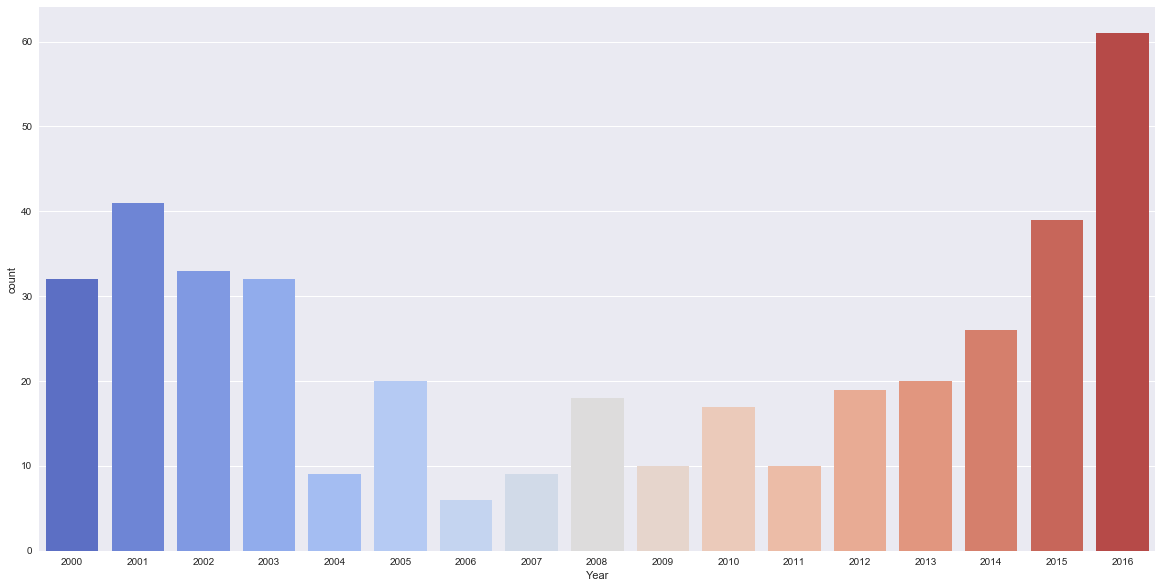

In [66]:
plt.subplots(figsize=(20,10))
f = sns.countplot('Year', data=US_attacks, palette="coolwarm")
plt.title("Number of Terrorist Attacks in the United States")
pylab.savefig('numAttacks.png')

[Text(0,0,'Business'),
 Text(0,0,'Government (General)'),
 Text(0,0,'Private Citizens & Property'),
 Text(0,0,'Abortion Related'),
 Text(0,0,'Military'),
 Text(0,0,'Educational Institution'),
 Text(0,0,'Police'),
 Text(0,0,'Government (Diplomatic)'),
 Text(0,0,'Religious Figures/Institutions'),
 Text(0,0,'Utilities'),
 Text(0,0,'Journalists & Media'),
 Text(0,0,'Airports & Aircraft'),
 Text(0,0,'NGO'),
 Text(0,0,'Transportation'),
 Text(0,0,'Unknown'),
 Text(0,0,'Telecommunication'),
 Text(0,0,'Tourists'),
 Text(0,0,'Terrorists/Non-State Militia'),
 Text(0,0,'Food or Water Supply'),
 Text(0,0,'Maritime'),
 Text(0,0,'Violent Political Party'),
 Text(0,0,'Other')]

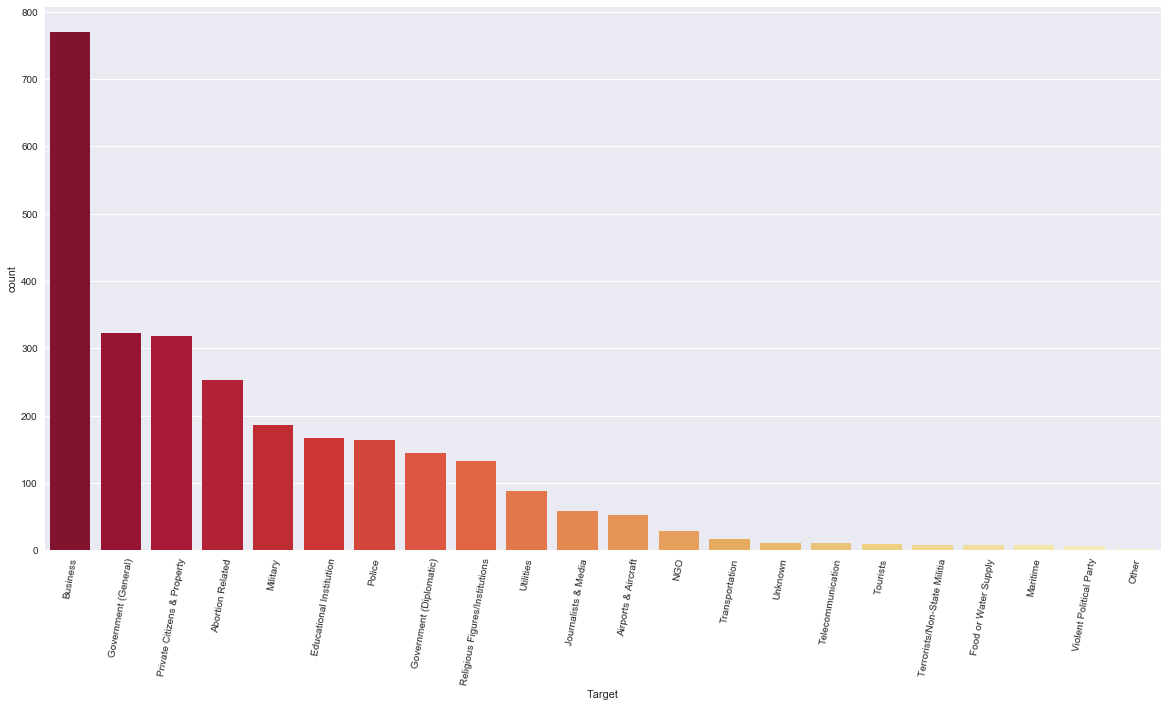

In [67]:
plt.subplots(figsize=(20,10))
f = sns.countplot('Target', data=US_attacks, palette="YlOrRd", order=US_attacks["Target"].value_counts().iloc[::-1].index)

# Making x values more readable 
# https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot
labels = f.get_xticklabels()
f.set_xticklabels(labels, rotation=80)
pylab.savefig('Targets.png')

In [68]:
plt.subplots(figsize=(20,10))
g = sns.countplot('State', data=US_attacks, palette="afmhot_r", order=US_attacks["State"].value_counts().iloc[::-1].index)

labels = g.get_xticklabels()
g.set_xticklabels(labels, rotation=80)

pylab.savefig('locations.png')

,Year,Month,Day,Country,Region,State,latitude,longitude,AttackType,Target,TargetSubtype,summary,Weapon,Killed,Wounded
66,1970,2,16,United States,North America,California,37.777125,-122.419644,Bombing/Explosion,Police,"Police Building (headquarters, station, school)",NaN,Explosives/Bombs/Dynamite,1.0,0.0
111,1970,3,5,United States,North America,Puerto Rico,18.466170,-66.106654,Assassination,Military,"Military Personnel (soldiers, troops, officers...",3/5/1970: Unknown Puerto Rican Nationalists as...,Firearms,2.0,0.0
119,1970,3,9,United States,North America,Maryland,39.538940,-76.348479,Bombing/Explosion,Unknown,NaN,3/9/1970: A bomb exploded in the car of Ralph ...,Explosives/Bombs/Dynamite,2.0,0.0
142,1970,3,20,United States,North America,Michigan,42.331685,-83.047924,Assassination,Private Citizens & Property,Named Civilian,3/20/1970: Unknown perpetrators shot and kille...,Firearms,1.0,0.0
223,1970,4,24,United States,North America,Maryland,39.290555,-76.609604,Armed Assault,Police,Police Security Forces/Officers,4/24/1970: Three members of the Black Panthers...,Firearms,1.0,1.0
274,1970,5,9,United States,North America,California,38.551295,-121.471066,Armed Assault,Police,Police Security Forces/Officers,5/9/1970: Sacramento Police Officer Bernard Be...,Firearms,1.0,0.0
291,1970,5,15,United States,North America,Washington,47.603560,-122.329439,Bombing/Explosion,Business,NaN,"5/15/1970: Larry G. Ward, an African American,...",Explosives/Bombs/Dynamite,1.0,0.0
299,1970,5,22,United States,North America,Minnesota,44.946604,-93.136446,Armed Assault,Police,Police Security Forces/Officers,5/22/1970: Police Officer James Sackett is mur...,Firearms,1.0,0.0
307,1970,5,28,United States,North America,California,38.579065,-121.491014,Armed Assault,Police,Police Security Forces/Officers,NaN,Firearms,1.0,0.0
357,1970,6,19,United States,North America,Illinois,41.884150,-87.632409,Armed Assault,Police,Police Security Forces/Officers,"6/19/1970: Bruce Sharp and William Redwine, bo...",Firearms,1.0,0.0
